## Importações 

In [2]:
#pip install pandas matplotlib scikit-learn

In [3]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
df =  pd.read_csv("movies.csv")

## Filtros

### Filmes ja lançados (status = Released)
Filmes que ainda não foram lançados não possuem dados importantes para a análise

In [5]:
registros_antes = len(df)
df = df[df['status'] == 'Released']
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 5223


### Registros duplicados
Não faz sentido ter o mesmo filme mais de uma vez

In [6]:
registros_antes = len(df)
df = df.drop_duplicates()
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 0


#### Duplicados por titulo e data de lançamento

In [7]:
duplicados = df[df.duplicated(subset=['title', 'release_date'], keep=False)]
exemplo = df[df['title'].isin(['The Eighth Clause', 'Battle: Freestyle'])].sort_values(by='title')
exemplo.head(10)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
126,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,333.723,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,28.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
198,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,238.540,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,30.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
234,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,210.928,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,30.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
13,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.6,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN
15815,841524,The Eighth Clause,Drama-Thriller,es,Kat and Borja appear to be a perfect couple bu...,10.293,SDB Films-El Hombre Orquesta-Expansión Films E...,2022-04-29,0.0,0.0,80.0,Released,NaN,4.2,6.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/5CbVMeLvaGn87gx05waiIJ0JySr.jpg,/uA0nUh1JerC4TkNiTzwS4B5kjTN.jpg,769636-346651-324542-343674-227970


In [8]:
registros_antes = len(df)
df = df.drop_duplicates(subset=['title', 'release_date'])
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 61422


In [9]:
exemplo = df[df['title'].isin(['The Eighth Clause', 'Battle: Freestyle'])].sort_values(by='title')
exemplo.head(10)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
126,785521,Battle: Freestyle,Romance-Drama,no,Amalie and Mikael lead their street dance team...,333.723,Friland Produksjon AS,2022-04-01,0.0,0.0,88.0,Released,NaN,5.1,28.0,Lisa Teige-Fabian Svegaard Tapia-Ellen Dorrit ...,paris france-based on novel or book-norway-dan...,/6D6QumiHEhnpZG12Ibjy2BxA6n4.jpg,/8WpRRiz3qQqzBiifCTm1dW0b6bs.jpg,818750-790525-800407-739993-946726-682344-9532...
13,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.6,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN


### Budget > 0
Filmes com budget igual a 0 ou negativo, representam inconssitência com as informações, trazendo erros para a analise

In [10]:
registros_antes = len(df)
df = df[df['budget'] > 0]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")


Registros perdidos com o filtro: 622512


In [11]:
df.nsmallest(10, 'budget')[['title', 'budget']]

,title,budget
1484,Onsen porno chitai,1.0
2288,Down,1.0
4072,All About Lily Chou-Chou,1.0
11110,Punga,1.0
12715,One Dollar,1.0
14876,PSYCHOTROPIA,1.0
23820,Subject,1.0
28413,Hush,1.0
31892,The Guv'nor,1.0
37160,The Haunting of Alcatraz,1.0


Subject 
The Haunting of Alcatraz 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33160 entries, 0 to 722273
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    33160 non-null  int64  
 1   title                 33160 non-null  object 
 2   genres                30067 non-null  object 
 3   original_language     33160 non-null  object 
 4   overview              31483 non-null  object 
 5   popularity            33160 non-null  float64
 6   production_companies  23881 non-null  object 
 7   release_date          31001 non-null  object 
 8   budget                33160 non-null  float64
 9   revenue               33160 non-null  float64
 10  runtime               32803 non-null  float64
 11  status                33160 non-null  object 
 12  tagline               18200 non-null  object 
 13  vote_average          33160 non-null  float64
 14  vote_count            33160 non-null  float64
 15  credits               3

In [13]:
registros_antes = len(df)
df = df[df['budget'] > 1000000]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 20797


In [14]:
df.nsmallest(10, 'budget')[['title', 'budget']]

,title,budget
634717,TestMovie,1000300.0
113467,Love Laughs at Andy Hardy,1001000.0
31553,Roadie,1002263.0
27673,Edward II,1003575.0
33440,Noah's Ark,1005000.0
281518,Forebodings,1007400.0
671716,The Killer of Montmartre,1007640.0
70279,Paper Champions,1007750.0
172808,Letters to Angel,1008772.0
261532,The Sailor Takes a Wife,1012000.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12363 entries, 0 to 722273
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12363 non-null  int64  
 1   title                 12363 non-null  object 
 2   genres                12260 non-null  object 
 3   original_language     12363 non-null  object 
 4   overview              12249 non-null  object 
 5   popularity            12363 non-null  float64
 6   production_companies  11687 non-null  object 
 7   release_date          12294 non-null  object 
 8   budget                12363 non-null  float64
 9   revenue               12363 non-null  float64
 10  runtime               12346 non-null  float64
 11  status                12363 non-null  object 
 12  tagline               9076 non-null   object 
 13  vote_average          12363 non-null  float64
 14  vote_count            12363 non-null  float64
 15  credits               1

### Runtime > 0
Filmes com runtime igual a 0 ou negativo, representam inconssitência com as informações, trazendo erros para a analise

In [16]:
registros_antes = len(df)
df = df[df['runtime'] > 60]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 272


### Vote_count > 0
Filmes com vote_count igual a 0 ou negativo, representam inconssitência com as informações, trazendo erros para a analise, principalmente por se tratar de uma variável altamente ligada ao target "vote_average"

In [ ]:
registros_antes = len(df)
df = df[df['vote_count'] > 30]
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 286


### Removendo colunas que não serão utilizadas na análise
- Title -> Tem algum uso? processamento textual?
- Overview -> não usaremos processamento textual
- Production Companies -> da para usar com um One Hot Encoding? ou é so processamento textual?
- Revenue -> Vazamento de dados?
- Status -> registro unico agr, ent inutil
- Tagline -> não usaremos processamento textual e 85% dos registros são NaN
- vote_avarege -> TARGET 
- vote_count -> vazamento de dados? 
- Credits -> da para separar e utilizar com um One Hot Encoding? ou é so processamento textual?
- Keywords -> não usaremos processamento textual e 71% dos registros são NaN
- Poster_path e Backdrop_path -> não faz sentido para a análise
- Recommendations -> não faz sentido para a análise, 95% dos valores são NaN, vazamento de dados

In [18]:
df = df.drop(columns=[
    'id','title', 'overview', 'revenue', 'status', 'tagline', 
    'vote_count', 'poster_path', 'backdrop_path', 'recommendations', 'keywords'
])

# Colunas que serão utilizadas na análise
print("Colunas que serão utilizadas na análise:")
print(df.columns)

Colunas que serão utilizadas na análise:
Index(['genres', 'original_language', 'popularity', 'production_companies',
       'release_date', 'budget', 'runtime', 'vote_average', 'credits'],
      dtype='object')


### Limpando todos os valores nulos

In [19]:
df.isnull().sum()

genres                   34
original_language         0
popularity                0
production_companies    504
release_date              6
budget                    0
runtime                   0
vote_average              0
credits                  17
dtype: int64

In [20]:
registros_antes = len(df)
df = df.dropna()
registros_depois = len(df)
print(f"Registros perdidos com o filtro: {registros_antes - registros_depois}")

Registros perdidos com o filtro: 526


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11279 entries, 0 to 700888
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                11279 non-null  object 
 1   original_language     11279 non-null  object 
 2   popularity            11279 non-null  float64
 3   production_companies  11279 non-null  object 
 4   release_date          11279 non-null  object 
 5   budget                11279 non-null  float64
 6   runtime               11279 non-null  float64
 7   vote_average          11279 non-null  float64
 8   credits               11279 non-null  object 
dtypes: float64(4), object(5)
memory usage: 881.2+ KB


In [22]:
# Exibe estatísticas descritivas das colunas numéricas do DataFrame df
df.describe()

,popularity,budget,runtime,vote_average
count,11279.000000,1.127900e+04,11279.000000,11279.000000
mean,28.409766,2.341542e+07,108.940864,6.234197
std,175.777942,3.631785e+07,22.282146,1.022415
min,0.600000,1.001000e+06,61.000000,0.500000
25%,6.250000,3.733050e+06,94.000000,5.700000
50%,11.638000,1.000000e+07,104.000000,6.300000
75%,20.984500,2.500000e+07,119.000000,6.900000
max,8763.998000,4.600000e+08,437.000000,10.000000


## Ajustando colunas 

In [23]:
def multi_hot_top_n(df, col, sep='-', top_n=20):
    # separa por hífen e explode
    exploded = df[col].str.split(sep).explode().str.strip()
    
    # conta as mais comuns
    top = exploded.value_counts().nlargest(top_n).index

    # cria listas só com os top ou "Outros"
    def filter_top(vals):
        return [v.strip() if v.strip() in top else 'Outros' for v in vals.split(sep)]
    
    filtered = df[col].apply(filter_top)
    
    mlb = MultiLabelBinarizer()
    result = pd.DataFrame(mlb.fit_transform(filtered), columns=mlb.classes_, index=df.index)
    return result


### Data de lançamento
- Transformando em duas colunas, uma responsável pelo ano de lançamento e outra pelo mês de lançamento

In [24]:
# Tratando a data
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df.drop(columns=['release_date'], inplace=True)

### Generos cinematograficos 

In [25]:
teste = df['genres'].apply(lambda x: x.split('-')).copy()
teste = teste.explode().reset_index(drop=True)
genre_counts = teste.value_counts() # Apply value_counts directly to the Series
print(genre_counts)
print(len(genre_counts))

# SMOTE 
# SMOTE-EEN

genres
Drama              5234
Comedy             3805
Action             2938
Thriller           2910
Romance            1910
Adventure          1851
Crime              1640
Horror             1377
Science Fiction    1188
Family             1130
Fantasy            1068
Mystery             883
History             673
Animation           602
War                 469
Music               367
Western             191
TV Movie            146
Documentary         112
Name: count, dtype: int64
19


In [26]:
genres_encoded = multi_hot_top_n(df, 'genres', top_n=19)

In [27]:
df= pd.concat([df.drop(['genres'], axis=1),
                genres_encoded], axis=1)

### Ajustando coluna da production_companies

In [28]:
teste = df['production_companies'].apply(lambda x: x.split('-')).copy()
teste = teste.explode().reset_index(drop=True)
production_companies_counts = teste.value_counts() # Apply value_counts directly to the Series
print(production_companies_counts.head(20))
print(len(production_companies_counts))

production_companies
Warner Bros. Pictures        634
Universal Pictures           607
20th Century Fox             483
Columbia Pictures            460
Paramount                    443
Goldwyn                      342
Metro                        339
Mayer                        330
New Line Cinema              248
Canal+                       239
Walt Disney Pictures         206
Lionsgate                    165
Touchstone Pictures          164
Miramax                      163
United Artists               156
StudioCanal                  143
Relativity Media             126
TriStar Pictures             126
DreamWorks Pictures          120
Village Roadshow Pictures    104
Name: count, dtype: int64
12333


In [29]:
companies_encoded = multi_hot_top_n(df, 'production_companies', top_n=20)

In [30]:
df= pd.concat([df.drop(['production_companies'], axis=1),
                companies_encoded], axis=1)

### Ajustando coluna da credits????

### Identificando e tratando outliers em variáveis numéricas do df

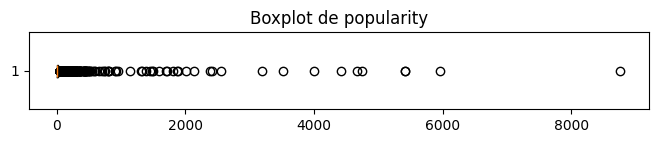

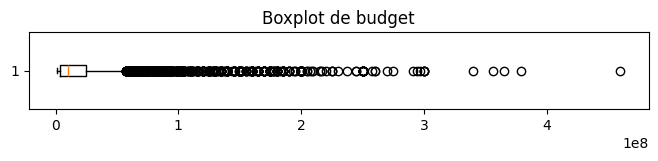

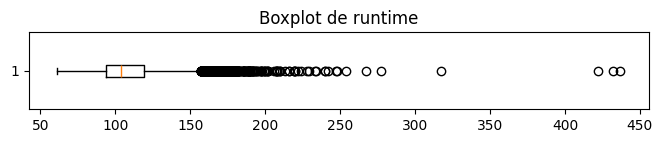

In [31]:
import matplotlib.pyplot as plt

numeric_cols = df[['popularity', 'budget', 'runtime']].columns

for col in numeric_cols:
    plt.figure(figsize=(8, 1))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

## Tratamento com Cap nos outliers
 - Função para aplicar o "cap" nos outliers usando o método do IQR (Interquartile Range).
 - O cap limita os valores extremos (outliers) ao valor máximo permitido pelo intervalo interquartil,
 - reduzindo o impacto desses valores sem removê-los do dataset.

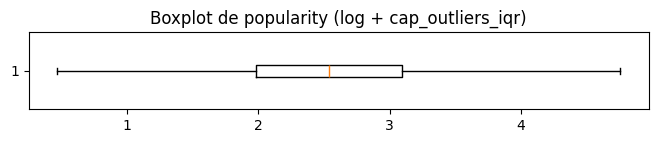

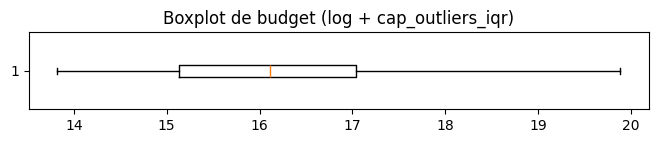

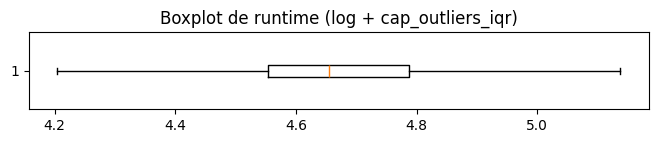

In [32]:
import numpy as np

def log_transform(df, columns):
    for col in columns:
        # Adiciona 1 para evitar log(0)
        df[col] = np.log1p(df[col])
    return df

def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df = log_transform(df, numeric_cols)
df = cap_outliers_iqr(df, numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(8, 1))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot de {col} (log + cap_outliers_iqr)')
    plt.show()


## To CSV

In [33]:
#df.to_csv('novo_tratamento.csv', index=False)